In [1]:
import pandas as pd
import numpy as np

import pickle
import pdb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# calcular los tiempos transcurridos por persona
df_atenciones = pd.read_csv("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_ATENCIONES.csv")
df_atenciones.head()

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,41473799,62,A,M,1045.0,20190518,60a+,C159,P,714
1,41473799,62,A,M,1045.0,20190518,60a+,C169,P,714
2,41474440,57,A,M,1243.0,20190522,30a-59a,C169,D,11165
3,41474302,55,A,F,1243.0,20190524,30a-59a,C719,D,11165
4,41474362,42,A,F,808.0,20190521,30a-59a,C509,R,2288


In [8]:
df_atenciones.shape

(943514, 13)

In [4]:
df_atenciones['Date_atencion'] = pd.to_datetime(df_atenciones['Fecha_atencion'], format="%Y%m%d")
df_atenciones['Date_atencion'].head()

0   2019-05-18
1   2019-05-18
2   2019-05-22
3   2019-05-24
4   2019-05-21
Name: Date_atencion, dtype: datetime64[ns]

In [15]:
# colocar una columna que sea del tipo de evento: atención, tamizaje, tratamiento, procedimiento
# hacer una base con la persona como index1 y el tipo de evento en index2, el conteo como index3 y 
#  el valor de la fecha
df_atenciones['ones'] = 1
df_atenciones = df_atenciones.sort_values(['id_persona','Date_atencion'])
df_atenciones['nevents'] = df_atenciones.groupby('id_persona')['ones'].transform('cumsum')

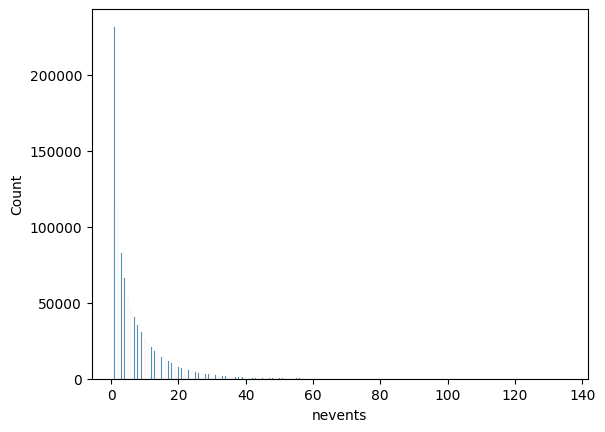

In [10]:
sns.histplot(df_atenciones['nevents'])
plt.show()

In [36]:
df_atenciones.loc[df_atenciones['nevents']==5].head(20)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Date_atencion,ones,nevents,dist_events
15298,24,67,A,F,1859.0,20230417,60a+,C679,D,6207,2023-04-17,1,5,3 days
14435,485,65,A,M,1453.0,20210128,60a+,C839,R,3,2021-01-28,1,5,16 days
15309,584,60,A,M,1859.0,20190416,60a+,C349,D,6203,2019-04-16,1,5,34 days
995,1874,63,A,F,1865.0,20190517,60a+,C478,R,5573,2019-05-17,1,5,4 days
10878,2154,57,A,M,1865.0,20210727,30a-59a,C921,D,6207,2021-07-27,1,5,25 days
16834,2166,62,A,F,1323.0,20230613,60a+,C539,D,21646,2023-06-13,1,5,60 days
15408,3374,81,A,F,1865.0,20210706,60a+,C20X,D,5554,2021-07-06,1,5,0 days
24588,4318,72,A,M,1859.0,20190704,60a+,C449,R,5574,2019-07-04,1,5,90 days
14507,4457,55,A,F,1460.0,20210429,30a-59a,C530,D,6207,2021-04-29,1,5,21 days
18754,4791,57,A,F,1859.0,20230616,30a-59a,C431,D,5573,2023-06-16,1,5,0 days


In [41]:
df_atenciones.loc[df_atenciones['id_persona']==7770]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Date_atencion,ones,nevents,dist_events
16910,7770,76,A,M,1865.0,20210108,60a+,C61X,D,5573,2021-01-08,1,1,NaT
16911,7770,76,A,M,1865.0,20210125,60a+,C61X,D,6207,2021-01-25,1,2,17 days
16913,7770,76,A,M,1865.0,20210720,60a+,C61X,D,5573,2021-07-20,1,3,176 days
16912,7770,78,A,M,1865.0,20230313,60a+,C61X,R,5573,2023-03-13,1,4,601 days
16914,7770,78,A,M,1865.0,20230329,60a+,C61X,D,6207,2023-03-29,1,5,16 days


In [22]:
# distancia entre eventos
def _get_dist_events(serie):
    return serie - serie.shift(1)

In [23]:
df_atenciones['dist_events'] = df_atenciones.groupby('id_persona')['Date_atencion'].transform(_get_dist_events)

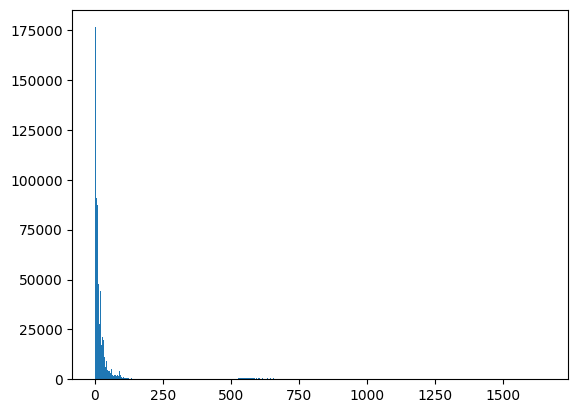

In [30]:
plt.hist(df_atenciones['dist_events'].dt.days, bins=500)
plt.show()

In [48]:
# enfermedades
df_atenciones['Diagnostico'].value_counts()

Diagnostico
C509    143057
C539     63391
C61X     54683
C169     34686
C189     34320
         ...  
c480         1
c418         1
c538         1
c189         1
c80x         1
Name: count, Length: 520, dtype: int64

In [50]:
df_tratamientos = pd.read_csv("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_TRATAMIENTOS.csv")
df_tratamientos.head()

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx
0,41437641,7243,30,A,M,NaN,20230313,30a-59a,90780,D
1,41437641,7243,30,A,M,NaN,20230401,30a-59a,96421,D
2,41437641,7243,30,A,M,NaN,20230401,30a-59a,90780,D
3,41437641,7243,30,A,M,NaN,20230131,30a-59a,90780,D
4,41437641,7243,30,A,M,NaN,20230227,30a-59a,96421,D


In [53]:
df_tratamientos['Date_atencion'] = pd.to_datetime(df_tratamientos['Fecha_atencion'], format="%Y%m%d")

In [54]:
df_tratamientos['Evento'] = 'Tratamiento'
df_atenciones['Evento'] = 'Atención'

In [55]:
df_tratamientos['ones'] = 1
df_tratamientos = df_tratamientos.sort_values(['id_persona','Date_atencion'])
df_tratamientos['nevents'] = df_tratamientos.groupby('id_persona')['ones'].transform('cumsum')

In [56]:
df_tratamientos['dist_events'] = df_tratamientos.groupby('id_persona')['Date_atencion'].transform(_get_dist_events)

In [81]:
df_events = pd.concat([df_atenciones, df_tratamientos])
# df_events = df_events.set_index(['id_persona','Evento','nevents'])

In [82]:
# la observación es estudiable si su primera atención y primer tratamiento fue entre enero y julio del mismo año
# sre_atencion_min = df_events.groupby(['id_persona','Evento'])['Date_atencion'].transform(min)
sre_atencion_min = df_events.loc[df_events['Evento']=='Atención'].groupby('id_persona').agg({'Date_atencion':min}).rename({'Date_atencion':'atencion_date_min'}, axis=1)
sre_tratamiento_min = df_events.loc[df_events['Evento']=='Tratamiento'].groupby('id_persona').agg({'Date_atencion':min}).rename({'Date_atencion':'tratamiento_date_min'}, axis=1)

In [83]:
df_events = df_events.merge(sre_atencion_min, left_on='id_persona', right_index=True, how='outer')
df_events = df_events.merge(sre_tratamiento_min, left_on='id_persona', right_index=True, how='outer')

In [85]:
df_events['dist_trat_atencion'] = df_events['tratamiento_date_min'] - df_events['atencion_date_min']

In [91]:
# solo eventos de tratamiento y atención en el mismo año
df_events['tratamiento_date_min_year'] = df_events['tratamiento_date_min'].dt.year
df_events['atencion_date_min_year'] = df_events['atencion_date_min'].dt.year

In [95]:
df_events['same_year'] = df_events['atencion_date_min_year']==df_events['tratamiento_date_min_year']

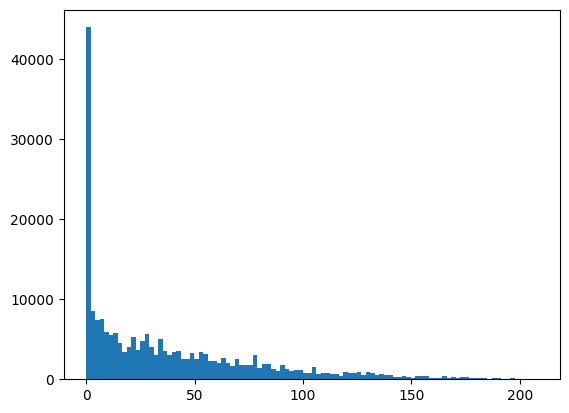

In [98]:
plt.hist(df_events.loc[df_events['same_year'],'dist_trat_atencion'].dt.days, bins=100)
plt.show()

# Pacientes de una sola dolencia

In [2]:
df_atenciones = pd.read_csv("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_ATENCIONES.csv")
df_atenciones['ones'] = 1

In [19]:
# df_atenciones.to_pickle("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_ATENCIONES.pickle")

In [59]:
df_atenciones = pd.read_pickle("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_ATENCIONES.pickle")

In [60]:
df_atenciones['Date_atencion'] = pd.to_datetime(df_atenciones['Fecha_atencion'], format="%Y%m%d")
df_atenciones = df_atenciones.sort_values(['id_persona','Date_atencion'])
df_atenciones['nevents'] = df_atenciones.groupby('id_persona')['ones'].transform('cumsum')

In [3]:
df_enfermedades = df_atenciones.loc[df_atenciones['Tipo_Dx']=='D',['id_persona','Diagnostico','ones']].drop_duplicates()
df_enfermedades['enfermedades_id'] = df_enfermedades.groupby('id_persona')['ones'].transform('cumsum')
df_enfermedades['enfermedades_n'] = df_enfermedades.groupby('id_persona')['enfermedades_id'].transform(max)

In [10]:
# 530, 531, 538, 539; serie_530
serie_id_cuello_uterino = df_enfermedades.loc[((df_enfermedades['Diagnostico']=='C530') |
                                 (df_enfermedades['Diagnostico']=='C531') |
                                 (df_enfermedades['Diagnostico']=='C538') |
                                 (df_enfermedades['Diagnostico']=='C539'))
                                & (df_enfermedades['enfermedades_n']==1),'id_persona']

In [14]:
# verificar que no se repitan
serie_id_cuello_uterino.duplicated().value_counts()

id_persona
False    11563
Name: count, dtype: int64

In [ ]:
serie_id_cuello_uterino_non_exclusive = df_enfermedades.loc[((df_enfermedades['Diagnostico']=='C530') |
                                 (df_enfermedades['Diagnostico']=='C531') |
                                 (df_enfermedades['Diagnostico']=='C538') |
                                 (df_enfermedades['Diagnostico']=='C539'))
                                & (df_enfermedades['enfermedades_n']>1),'id_persona'].drop_duplicates()

In [18]:
# no son muchas las que tienen más de un cáncer o un cáncer y otra más
serie_id_cuello_uterino_non_exclusive

93        41433445
132          32416
190          28853
233           8601
606          41251
            ...   
942561    16703638
942782    31417547
943028    31430421
943160    33892740
943253    16738435
Name: id_persona, Length: 3281, dtype: int64

# Personas con cáncer de cuello uterino

In [40]:
serie_id_cuello_uterino

9         41474281
13        41473640
63        41474367
66        41475858
140           4547
            ...   
943041    25532425
943075    22919222
943102    16734570
943192    33893754
943254    41272004
Name: id_persona, Length: 11563, dtype: int64

# Base de datos de procedimientos

In [23]:
df_procedimientos = pd.read_csv("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_PROCEDIMIENTOS.csv")
df_procedimientos.head()

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,18388347,17,A,M,1248.0,20230412,12a-17a,C0009,D,4326
1,29359265,42,A,M,1032.0,20230601,30a-59a,99401,D,3489
2,35718701,10,M,M,1004.0,20210202,00a-11a,99401,D,3376
3,27847490,6,A,M,1151.0,20230322,00a-11a,92504,D,6609
4,35244915,20,A,M,1577.0,20230707,18a-29a,86780,D,2091


In [32]:
df_procedimientos['Date_atencion'] = pd.to_datetime(df_procedimientos['Fecha_atencion'], format="%Y%m%d")

In [34]:
df_procedimientos = df_procedimientos.sort_values(['id_persona','Date_atencion'])

In [35]:
df_procedimientos['ones'] = 1

In [36]:
df_procedimientos['proc_id'] = df_procedimientos.groupby('id_persona')['ones'].transform('cumsum')

In [37]:
df_procedimientos = df_procedimientos.set_index(['id_persona','proc_id'])

In [38]:
# df_procedimientos.to_pickle("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_PROCEDIMIENTOS.pickle")

In [47]:
person_proc = set(df_procedimientos.index.get_level_values(0))
person_aten = set(serie_id_cuello_uterino)

In [48]:
persons_proc_aten = person_aten.intersection(person_proc)

In [52]:
df_procedimientos_cuellouterino = df_procedimientos.loc[list(persons_proc_aten)]

In [55]:
# df_procedimientos_cuellouterino.to_pickle("C:/Users/saico/Downloads/DTS_DIGTEL_CANCER/DTS_DIGTEL_CANCER/TB_DIGTEL_CANCER_PROCEDIMIENTOS_cuellouterino.pickle")

In [58]:
df_procedimientos_cuellouterino['Diagnostico'].value_counts().head(50)

Diagnostico
88141       7124
99401       6640
99402.08    5969
99401.19    4262
99401.13    3455
85018       2062
99404       1831
D1330       1799
C0009       1587
99403.01    1516
93784       1294
96410       1287
88300       1231
85590       1228
86703       1227
85060       1218
85048       1216
85032       1216
57500       1140
99489       1109
82565       1088
82947       1087
86900        700
86780        689
86687        680
82040        680
86803        675
84155        669
83615        665
86906        665
86886        661
87340        661
84450        592
84460        588
82977        571
84075        548
87342        546
82247        531
82248        527
36430        526
85610        523
85014        519
96421        479
86704        478
87087        474
94760        467
93000        459
96365        454
76830        437
87285        414
Name: count, dtype: int64

In [61]:
df_procedimientos_cuellouterino = df_procedimientos_cuellouterino.reset_index()
df_procedimientos_cuellouterino = df_procedimientos_cuellouterino.rename({'proc_id':'nevents'}, axis=1)

In [65]:
df_atenciones = df_atenciones.set_index(['id_persona','nevents'])
df_atenciones_cuellouterino = df_atenciones.loc[list(persons_proc_aten)]
df_atenciones_cuellouterino = df_atenciones_cuellouterino.reset_index()

In [67]:
df_procedimientos_cuellouterino['Evento'] = 'Procedimiento'
df_atenciones_cuellouterino['Evento'] = 'Atención'

In [76]:
df_events_cuellouterino = pd.concat([df_atenciones_cuellouterino, df_procedimientos_cuellouterino])
df_events_cuellouterino = df_events_cuellouterino.set_index(['id_persona','Evento','nevents'])
df_events_cuellouterino = df_events_cuellouterino.sort_index()

In [81]:
df_events_cuellouterino = df_events_cuellouterino.reset_index().set_index(['id_persona','Date_atencion','Evento','nevents'])
df_events_cuellouterino = df_events_cuellouterino.sort_index()